In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import xgboost

In [3]:
import pickle

# GET REPORT_DATE

In [4]:
REPORT_DATE = '01-06-2023'

## GET FORMATTED AND SCORE

In [36]:
df =  pd.read_parquet(f'../data/{REPORT_DATE}/CASA_DAY_SINCE_LAST_TXN_CT_36M')
df1 = pd.read_parquet(f'../data/{REPORT_DATE}/SCORE_REACTIVE')
df2 = pd.read_parquet(f'../data/{REPORT_DATE}/REACTIVATED')

In [37]:
df.head()

,CUSTOMER_CDE,FTR_NM,FTR_VAL,RPT_DT
0,8979429,CASA_DAY_SINCE_LAST_TXN_CT_36M,1095,01-JUN-23
1,3387448,CASA_DAY_SINCE_LAST_TXN_CT_36M,1095,01-JUN-23
2,7861234,CASA_DAY_SINCE_LAST_TXN_CT_36M,1095,01-JUN-23
3,2766001,CASA_DAY_SINCE_LAST_TXN_CT_36M,1095,01-JUN-23
4,9205769,CASA_DAY_SINCE_LAST_TXN_CT_36M,1095,01-JUN-23


In [38]:
df1.head()

,CUSTOMER_CDE,SCORE
0,16900235,1.0
1,16920995,1.0
2,3752230,1.0
3,18069792,1.0
4,16881085,1.0


In [39]:
df2.head()

,CUSTOMER_CDE,FTR_NM,FTR_VAL,RPT_DT
0,11278218,REACTIVATED,0,01-JUN-23
1,1127822,REACTIVATED,0,01-JUN-23
2,11278223,REACTIVATED,0,01-JUN-23
3,11278225,REACTIVATED,0,01-JUN-23
4,11278226,REACTIVATED,0,01-JUN-23


In [40]:
len(df), len(df1), len(df2)

(16593962, 16593962, 7547617)

In [42]:
df['CUSTOMER_CDE'] = df['CUSTOMER_CDE'].astype(int)
df1['CUSTOMER_CDE'] = df1['CUSTOMER_CDE'].astype(int)
df2['CUSTOMER_CDE'] = df2['CUSTOMER_CDE'].astype(int)

In [41]:
df['CUSTOMER_CDE'].dtype, df1['CUSTOMER_CDE'].dtype, df2['CUSTOMER_CDE'].dtype

(dtype('O'), dtype('O'), dtype('O'))

In [43]:
FTR_NM = df['FTR_NM'].tolist()[0]
FTR_NM

'CASA_DAY_SINCE_LAST_TXN_CT_36M'

In [47]:
df = df.rename(columns={'FTR_VAL': FTR_NM})
df2 = df2.rename(columns={'FTR_VAL': 'REACTIVATED'})

In [48]:
df.columns, df1.columns, df2.columns

(Index(['CUSTOMER_CDE', 'FTR_NM', 'CASA_DAY_SINCE_LAST_TXN_CT_36M', 'RPT_DT'], dtype='object'),
 Index(['CUSTOMER_CDE', 'SCORE'], dtype='object'),
 Index(['CUSTOMER_CDE', 'FTR_NM', 'REACTIVATED', 'RPT_DT'], dtype='object'))

## MERGE together

In [49]:
df_merge = df[['CUSTOMER_CDE', FTR_NM]].merge(df1[['CUSTOMER_CDE','SCORE']],how='inner', left_on='CUSTOMER_CDE', right_on='CUSTOMER_CDE')
df_merge = df_merge.merge(df2[['CUSTOMER_CDE','REACTIVATED']],how='inner', left_on='CUSTOMER_CDE', right_on='CUSTOMER_CDE')
df_merge.head()

,CUSTOMER_CDE,CASA_DAY_SINCE_LAST_TXN_CT_36M,SCORE,REACTIVATED
0,8979429,1095,0.000259,0
1,3387448,1095,0.000260,0
2,7861234,1095,0.000503,0
3,2766001,1095,0.000228,0
4,9205769,1095,0.000291,0


In [50]:
len(df_merge)

7547617

# ANALYSIS

In [51]:
df_merge

,CUSTOMER_CDE,CASA_DAY_SINCE_LAST_TXN_CT_36M,SCORE,REACTIVATED
0,8979429,1095,0.000259,0
1,3387448,1095,0.000260,0
2,7861234,1095,0.000503,0
3,2766001,1095,0.000228,0
4,9205769,1095,0.000291,0
...,...,...,...,...
7547612,40408,1095,0.000219,0
7547613,10086570,1095,0.000460,0
7547614,8162282,1095,0.000047,0
7547615,8599624,1095,0.000695,0


In [54]:
df_merge['REACTIVATED'].value_counts(normalize=True), df_merge['REACTIVATED'].value_counts(normalize=False)

(0    0.99484
 1    0.00516
 Name: REACTIVATED, dtype: float64,
 0    7508672
 1      38945
 Name: REACTIVATED, dtype: int64)

In [58]:
df_merge['CASA_DAY_SINCE_LAST_TXN_CT_36M'] = df_merge['CASA_DAY_SINCE_LAST_TXN_CT_36M'].astype(int)

In [59]:
df_merge.dtypes

CUSTOMER_CDE                        int64
CASA_DAY_SINCE_LAST_TXN_CT_36M      int64
SCORE                             float32
REACTIVATED                        object
dtype: object

<Axes: xlabel='CASA_DAY_SINCE_LAST_TXN_CT_36M', ylabel='Density'>

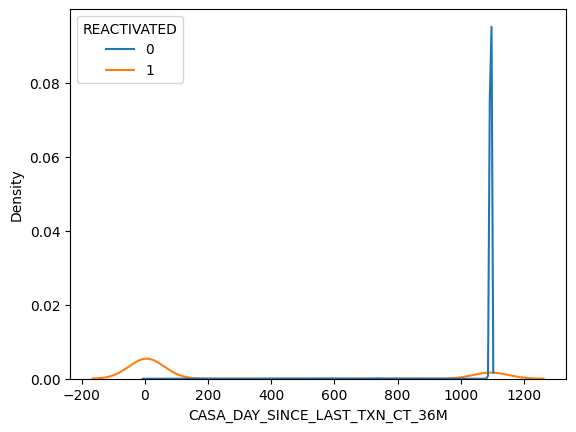

In [63]:
sns.kdeplot(df_merge, x=FTR_NM, hue='REACTIVATED', common_norm=False)

<Axes: xlabel='CASA_DAY_SINCE_LAST_TXN_CT_36M', ylabel='REACTIVATED'>

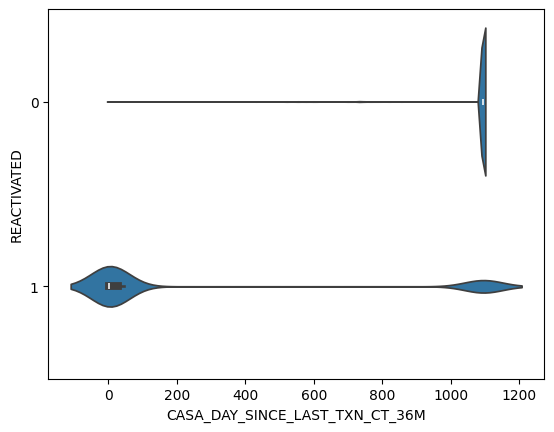

In [64]:
sns.violinplot(df_merge, x=FTR_NM, y='REACTIVATED')

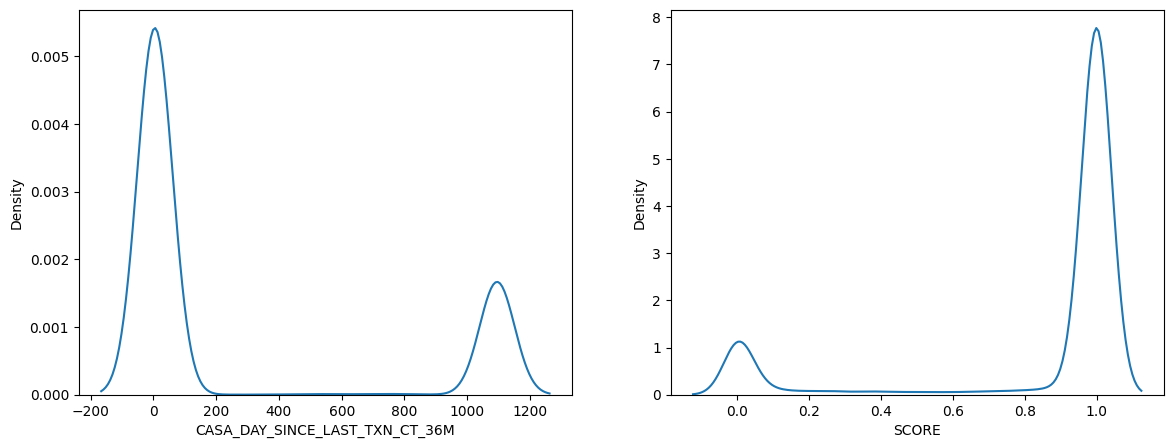

In [80]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(df_merge[df_merge['REACTIVATED']=='1'], x=FTR_NM,  ax=axs[0])
sns.kdeplot(df_merge[df_merge['REACTIVATED']=='1'], x='SCORE',  ax=axs[1])
plt.show()